In [1]:
import serial
import io
import random
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
print(serial.__version__)
import cv2

3.4


In [7]:
'''Testing Serial Channel by sending one byte. '''

baudrate = 250000

ser = serial.Serial()
ser.port = 'COM3'
ser.baudrate = baudrate
ser.timeout = 4

ser.open()
strtowrite = b'a'
ser.write(strtowrite)
data = ser.read()
ser.close()
print(strtowrite, data)


b'a' b'a'


In [8]:
'''Loading list of images saved in Qoo'''

pad = r"C:\Users\Boss\Pictures\pix"

files = []
paths = []
for dirpath, dirnames, filenames in os.walk(pad):
    #print(np.shape(filenames))
    #print(os.path.join(str(filenames)))
    files.append(filenames)
    paths.append(dirpath)
files = files[0]
#print(files)

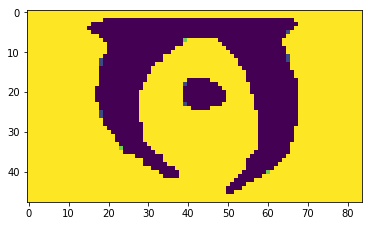

In [9]:
'''Loading & resizing file'''

imga = cv2.imread(os.path.join(paths[0], files[0]), cv2.IMREAD_GRAYSCALE)
nima = (cv2.resize(imga, (84, 48)))#.flatten()
plt.imshow(nima)

[[255 254 253 ... 253 254 255]
 [255 254 253 ... 253 254 255]
 [254 253 252 ... 252 253 254]
 ...
 [254 253 252 ... 252 253 254]
 [255 254 253 ... 253 254 255]
 [255 254 253 ... 253 254 255]]
1.0 0.0
0.4672298085901027
0.03529411764705882
0.48634512039247063
(4032,)
1937.0
2095.0
1.0 0.0


(<matplotlib.image.AxesImage at 0x1c18a7ca438>,)

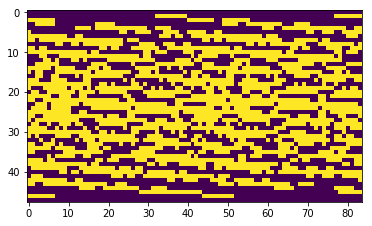

In [125]:
'''Grayscale data is scaled down to {0, 1} value. Threshold is [devide] parameter.'''

devide = 0.2 
fileindex = 10

imga = cv2.imread(os.path.join(paths[0], files[fileindex]), cv2.IMREAD_GRAYSCALE)
nima = np.rot90((cv2.resize(imga, (84, 48))), 2)#.flatten()
#nima[nima < 20] = 0
nimamin = np.min(nima)
nimamax = np.max(nima)

if np.sum(nima) != 0:    
    nimaa = (nima - nimamin) / nimamax    
    print(np.max(nimaa), np.min(nimaa))
    print(np.mean(nimaa))
    print(np.median(nimaa))
    print(np.std(nimaa))
    
    nimaa[nimaa > devide] = 1
    nimaa[nimaa <= devide] = 0

nimaaa = 1 - nimaa.T.flatten()
print(np.shape(nimaaa))
print(np.sum(nimaa))
print(np.sum(nimaaa))
print(np.max(nimaaa), np.min(nimaaa))
mulpli = 2 ** (np.arange(7, -1, -1)) 

mulpli = 2 ** (np.arange(8)) #Byte coefficients
screencount = (len(nimaaa) // 8)
data_l = []
ser.close()
ser.open()

for i in range(screencount):
    il = i * 8
    ih = (i * 8) + 8
    iii = int((np.sum(nimaaa[il:ih] * mulpli)))
    #print(iii)
    ii = chr(iii).encode('latin-1')
    ser.write(ii)
    data = ser.read()
    data_l.append(data)

ser.close()
plt.imshow(imga), # cmap='Greys'
plt.imshow(nimaaa.reshape(48,84)), # cmap='Greys'